<a href="https://colab.research.google.com/github/Kenethoriga/ADI-2024-Pre-Screening-Assessment/blob/main/Hub_Rental_Services_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code you're running loads a CSV file from a Google Sheet URL into a pandas DataFrame. It uses `pd.read_csv()` to fetch the data, then prints the first few rows of the data in a clean, table-like format using the `tabulate` module. This makes it easy to visually inspect a preview of the data in your console. Additionally, the tabular format used by `tabulate` makes the output more readable.


In [103]:
import pandas as pd

# Direct link to access the Google Sheet in CSV format
sheet_url = "https://docs.google.com/spreadsheets/d/1aoM7R_UQtf7TFTbtzV48U1AmoFyOYJWx/export?format=csv"

# Load the data into a DataFrame
df = pd.read_csv(sheet_url)

# Display the first few rows in tabular format
from tabulate import tabulate

# Using tabulate for a clean table-like display
print(tabulate(df.head(), headers='keys', tablefmt='pipe'))


|    |     ID | Entry Date   | Date of Extract   | Duration in programme   |   No. of implements owned | 1st Implement   | 2nd Implement   | Region of operation   | Country   | 2022             | 2023             |             2024 | Rented Implement?   |   Implement |     Days |     Acres  | Total Acres Serviced   |
|    |        |              |                   |                         |                           |                 |                 |                       |           | Acres serviced   | Acres serviced   |   Acres serviced |                     |      rented |   rented |   serviced |                        |
|---:|-------:|:-------------|:------------------|:------------------------|--------------------------:|:----------------|:----------------|:----------------------|:----------|:-----------------|:-----------------|-----------------:|:--------------------|------------:|---------:|-----------:|:-----------------------|
|  0 | 503176 | 19/1/2022    | 22/11/2024  

In [88]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0    ID                      194 non-null    int64 
 1   Entry Date               194 non-null    object
 2   Date of Extract          194 non-null    object
 3   Duration in programme    194 non-null    object
 4   No. of implements owned  194 non-null    int64 
 5   1st Implement            192 non-null    object
 6   2nd Implement            93 non-null     object
 7   Region of operation      194 non-null    object
 8   Country                  194 non-null    object
 9   2022
Acres serviced      185 non-null    object
 10  2023
Acres serviced      188 non-null    object
 11  2024
Acres serviced      189 non-null    object
 12  Rented Implement?        194 non-null    object
 13  Implement
rented         9 non-null      object
 14  Days
rented              194 non-null    i

In [89]:
# Clean column names by removing extra spaces and newlines
df.columns = df.columns.str.replace('\n', ' ').str.strip()


In [90]:
print(df.columns)

Index(['ID', 'Entry Date', 'Date of Extract', 'Duration in programme',
       'No. of implements owned', '1st Implement', '2nd Implement',
       'Region of operation', 'Country', '2022 Acres serviced',
       '2023 Acres serviced', '2024 Acres serviced', 'Rented Implement?',
       'Implement rented', 'Days rented', 'Acres  serviced',
       'Total Acres Serviced'],
      dtype='object')


The provided code performs data cleaning, analysis, and visualization on a DataFrame (`df`) containing information on acres serviced and implements owned over multiple years.

1. **Data Cleaning**: Converts date columns to datetime, fills missing implement values with 'None', and handles numeric columns by converting them to numeric format (coercing errors to NaN).
2. **Data Calculation**: Computes total acres serviced across the years (2022-2024) and adds a `Year` column from the `Entry Date`.
3. **Analysis**:
   - Aggregates total acres serviced by year.
   - Analyzes the performance based on the number of implements owned.
4. **Visualization**:
   - Bar chart of performance by number of implements owned.
   - Line chart of total acres serviced over the years.
   - Boxplot of the distribution of serviced acres from 2022 to 2024.
   - Correlation heatmap for numeric features in the dataset.

This process helps in understanding trends, performance, and relationships within the data.

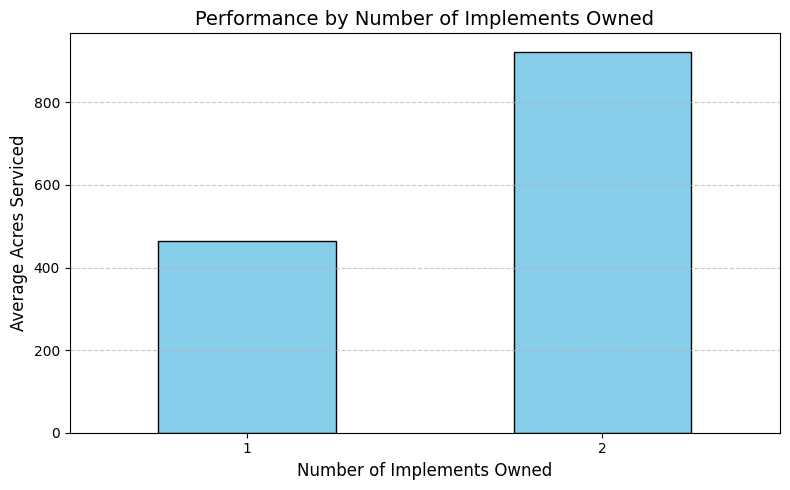

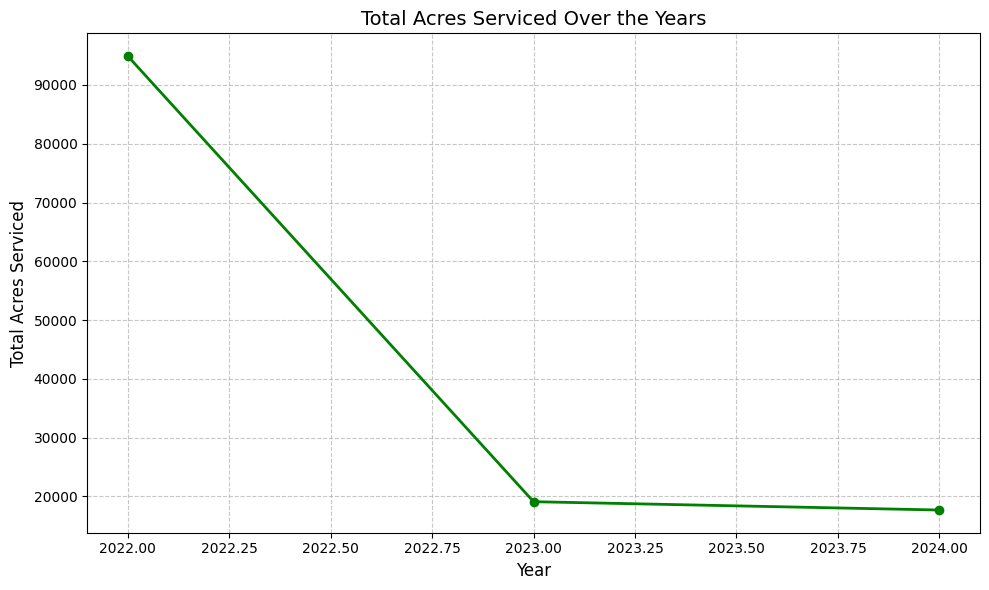

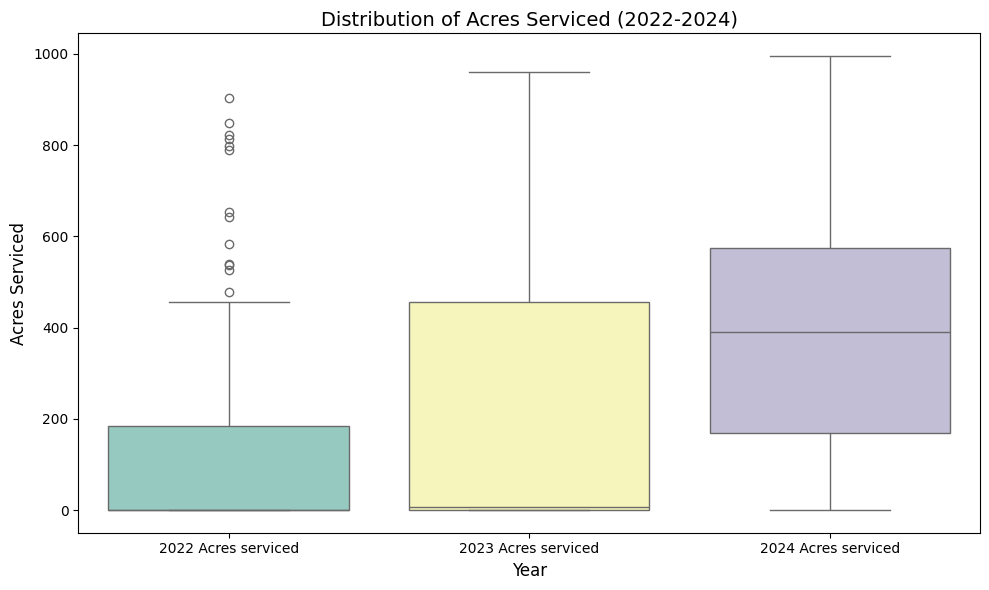

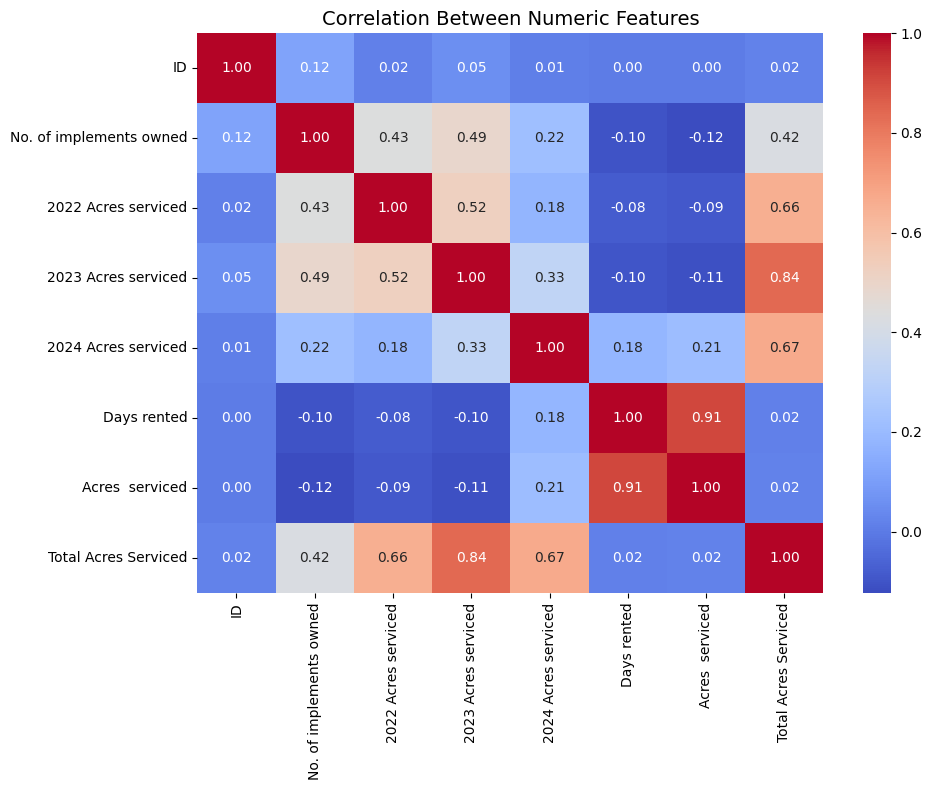

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime
df['Entry Date'] = pd.to_datetime(df['Entry Date'])
df['Date of Extract'] = pd.to_datetime(df['Date of Extract'])

# Fill missing implement values and handle numeric columns
df['2nd Implement'] = df['2nd Implement'].fillna('None')
numeric_columns = ['2022 Acres serviced', '2023 Acres serviced', '2024 Acres serviced', 'No. of implements owned']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate total acres serviced across all years
df['Total Acres Serviced'] = df[['2022 Acres serviced', '2023 Acres serviced', '2024 Acres serviced']].sum(axis=1)

# Add a 'Year' column from the 'Entry Date'
df['Year'] = df['Entry Date'].dt.year

# 1. Aggregate total acres serviced by year
acres_by_year = df.groupby('Year')['Total Acres Serviced'].sum()

# 2. Performance based on the number of implements owned
implement_performance = df.groupby('No. of implements owned')['Total Acres Serviced'].mean()

# 1. Performance by number of implements owned
plt.figure(figsize=(8, 5))
implement_performance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Performance by Number of Implements Owned', fontsize=14)
plt.xlabel('Number of Implements Owned', fontsize=12)
plt.ylabel('Average Acres Serviced', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Total acres serviced over the years
plt.figure(figsize=(10, 6))
acres_by_year.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Total Acres Serviced Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Acres Serviced', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Distribution of serviced acres (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['2022 Acres serviced', '2023 Acres serviced', '2024 Acres serviced']], palette="Set3")
plt.title('Distribution of Acres Serviced (2022-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Acres Serviced', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Correlation heatmap (only for numeric columns)
plt.figure(figsize=(10, 8))
numeric_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()



This code performs data analysis and visualization on a dataset. It computes summary statistics, handles missing data, aggregates acres serviced by year, and evaluates performance based on the number of implements owned. Visualizations include bar charts, line graphs, box plots, and correlation heatmaps to reveal insights into the dataset.

In [93]:
# Summary statistics for numeric columns
summary = df.describe()
print("\nSummary Statistics:\n", summary)

# Preview of the first few rows of the dataset
print("\nDataset Preview:\n", df.head())

# Checking for missing data
missing_data = df.isnull().sum()
print("\nMissing Data:\n", missing_data)

# Additional insights
print("\nAcres Serviced by Year:\n", acres_by_year)
print("\nPerformance by Implements Owned:\n", implement_performance)


Summary Statistics:
                   ID                     Entry Date      Date of Extract  \
count     194.000000                            194                  194   
mean   505421.247423  2023-05-13 19:10:30.927835136  2024-11-22 00:00:00   
min    303041.000000            2022-01-19 00:00:00  2024-11-22 00:00:00   
25%    503544.500000            2022-06-24 00:00:00  2024-11-22 00:00:00   
50%    505681.500000            2023-06-23 00:00:00  2024-11-22 00:00:00   
75%    506785.750000            2024-01-03 00:00:00  2024-11-22 00:00:00   
max    513671.000000            2024-10-31 00:00:00  2024-11-22 00:00:00   
std     14969.841421                            NaN                  NaN   

       No. of implements owned  2022 Acres serviced  2023 Acres serviced  \
count               194.000000           179.000000           176.000000   
mean                  1.469072           119.491899           227.841932   
min                   1.000000             0.000000             0

The provided code generates tabulated summaries for the dataset, covering several key aspects:

1. **Summary Statistics**: It calculates total records, average ID, date range, average year, and average total acres serviced.
2. **Missing Data**: Displays columns with missing values and the count of missing entries.
3. **Acres Serviced by Year**: Aggregates the total acres serviced for each year.
4. **Performance by Implements Owned**: Shows the average total acres serviced for each number of implements owned.
5. **Dataset Preview**: Displays a preview of the first few records, focusing on key columns like ID, entry date, and acres serviced.

Each section is formatted using the `tabulate` library to present the results in a structured and readable table format.

In [94]:
from tabulate import tabulate

# Summary Statistics
summary_stats = [
    ["Total Records", len(df)],
    ["Average ID", f"{df['ID'].mean():,.0f}"],
    ["Date Range (Entry)", f"{df['Entry Date'].min().date()} to {df['Entry Date'].max().date()}"],
    ["Average Year", f"{df['Year'].mean():.2f}"],
    ["Average Total Acres Serviced", f"{df['Total Acres Serviced'].mean():.2f}"]
]

# Missing Data
missing_data = df.isnull().sum()
missing_data_summary = [[col, missing] for col, missing in missing_data.items() if missing > 0]

# Acres Serviced by Year
acres_by_year_summary = [[year, f"{acres:,.2f}"] for year, acres in acres_by_year.items()]

# Performance by Implements Owned
performance_summary = [[implements, f"{avg:,.2f}"] for implements, avg in implement_performance.items()]

# Dataset Preview
preview = df.head()[
    ['ID', 'Entry Date', 'Date of Extract', 'No. of implements owned',
     '1st Implement', '2nd Implement', 'Region of operation', 'Total Acres Serviced']
].values.tolist()

# Printing the summaries
print("### Summary Statistics")
print(tabulate(summary_stats, headers=["Metric", "Value"], tablefmt="fancy_grid"))

print("\n### Missing Data")
print(tabulate(missing_data_summary, headers=["Field", "Missing Values"], tablefmt="fancy_grid"))

print("\n### Acres Serviced by Year")
print(tabulate(acres_by_year_summary, headers=["Year", "Total Acres Serviced"], tablefmt="fancy_grid"))

print("\n### Performance by Implements Owned")
print(tabulate(performance_summary, headers=["Implements Owned", "Average Total Acres Serviced"], tablefmt="fancy_grid"))




### Summary Statistics
╒══════════════════════════════╤══════════════════════════╕
│ Metric                       │ Value                    │
╞══════════════════════════════╪══════════════════════════╡
│ Total Records                │ 194                      │
├──────────────────────────────┼──────────────────────────┤
│ Average ID                   │ 505,421                  │
├──────────────────────────────┼──────────────────────────┤
│ Date Range (Entry)           │ 2022-01-19 to 2024-10-31 │
├──────────────────────────────┼──────────────────────────┤
│ Average Year                 │ 2022.88                  │
├──────────────────────────────┼──────────────────────────┤
│ Average Total Acres Serviced │ 678.90                   │
╘══════════════════════════════╧══════════════════════════╛

### Missing Data
╒═════════════════════╤══════════════════╕
│ Field               │   Missing Values │
╞═════════════════════╪══════════════════╡
│ 1st Implement       │                2 │
├──────

In [104]:
from tabulate import tabulate

# Display the entire dataset in tabulate format
print("\nUpdated Dataset in Tabulate Form:\n")
print(tabulate(df.head(), headers='keys', tablefmt='pipe'))

# Export the updated dataset to a CSV file (optional)
output_file = "updated_dataset.csv"
df.to_csv(output_file, index=False)
print(f"\nThe updated dataset has been saved to '{output_file}'.")




Updated Dataset in Tabulate Form:

|    |     ID | Entry Date   | Date of Extract   | Duration in programme   |   No. of implements owned | 1st Implement   | 2nd Implement   | Region of operation   | Country   | 2022             | 2023             |             2024 | Rented Implement?   |   Implement |     Days |     Acres  | Total Acres Serviced   |
|    |        |              |                   |                         |                           |                 |                 |                       |           | Acres serviced   | Acres serviced   |   Acres serviced |                     |      rented |   rented |   serviced |                        |
|---:|-------:|:-------------|:------------------|:------------------------|--------------------------:|:----------------|:----------------|:----------------------|:----------|:-----------------|:-----------------|-----------------:|:--------------------|------------:|---------:|-----------:|:-----------------------|
|  0 | 

In [96]:
print(df.columns)

Index(['ID', 'Entry Date', 'Date of Extract', 'Duration in programme',
       'No. of implements owned', '1st Implement', '2nd Implement',
       'Region of operation', 'Country', '2022 Acres serviced',
       '2023 Acres serviced', '2024 Acres serviced', 'Rented Implement?',
       'Implement rented', 'Days rented', 'Acres  serviced',
       'Total Acres Serviced', 'Year'],
      dtype='object')


The provided code filters data into customers who rented and did not rent implements, then compares the acres serviced using a t-test. It visualizes customer distribution via a pie chart, showing the percentage of rented vs. non-rented implement customers. The code outputs the t-test result, percentage of renters, and summary statistics.




Mean Acres Serviced (Rented Implements): 578.67
Mean Acres Serviced (Non-Rented Implements): 683.77
Standard Deviation (Rented Implements): 229.60
Standard Deviation (Non-Rented Implements): 552.69


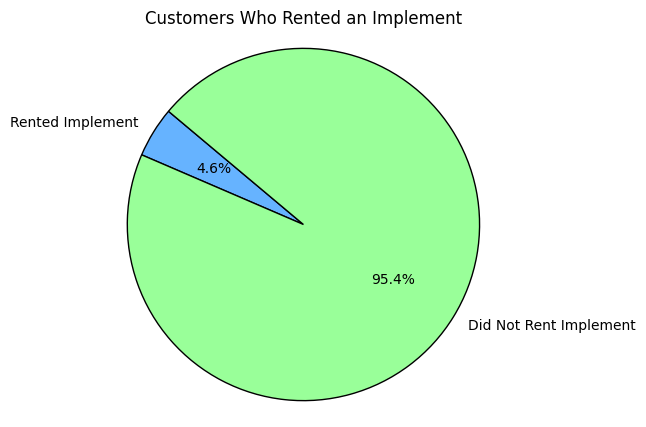

Total Customers: 194
Customers who rented an implement: 9
Percentage of customers who rented an implement: 4.64%
T-statistic: -0.57
P-value: 0.5714
There is no significant difference in acres serviced between the two groups.
95% Confidence Interval for Rented Implements: (402.18158831542104, 755.1517450179122)
95% Confidence Interval for Non-Rented Implements: (603.6040457651492, 763.9427650456615)


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Filter customers who rented implements (assuming 'Rented Implement?' column holds 'Yes' or 'No')
rented_customers = df[df['Rented Implement?'] == 'Yes']
non_rented_customers = df[df['Rented Implement?'] == 'No']

# Calculate acres serviced for each group
acres_serviced_rented = rented_customers['Total Acres Serviced']
acres_serviced_non_rented = non_rented_customers['Total Acres Serviced']

# Descriptive statistics for both groups
mean_rented = acres_serviced_rented.mean()
mean_non_rented = acres_serviced_non_rented.mean()
std_rented = acres_serviced_rented.std()
std_non_rented = acres_serviced_non_rented.std()

print(f"Mean Acres Serviced (Rented Implements): {mean_rented:.2f}")
print(f"Mean Acres Serviced (Non-Rented Implements): {mean_non_rented:.2f}")
print(f"Standard Deviation (Rented Implements): {std_rented:.2f}")
print(f"Standard Deviation (Non-Rented Implements): {std_non_rented:.2f}")

# Perform the t-test between the two groups
t_stat, p_value = stats.ttest_ind(acres_serviced_rented, acres_serviced_non_rented, nan_policy='omit')

# Calculate the 95% confidence intervals for the means of both groups
conf_int_rented = stats.t.interval(0.95, len(acres_serviced_rented)-1, loc=mean_rented, scale=stats.sem(acres_serviced_rented))
conf_int_non_rented = stats.t.interval(0.95, len(acres_serviced_non_rented)-1, loc=mean_non_rented, scale=stats.sem(acres_serviced_non_rented))

# Prepare data for pie chart
total_customers = len(df)
rented_implement_customers = len(rented_customers)
sizes = [rented_implement_customers, total_customers - rented_implement_customers]
labels = ['Rented Implement', 'Did Not Rent Implement']
colors = ['#66b3ff', '#99ff99']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Customers Who Rented an Implement')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print the results
print(f"Total Customers: {total_customers}")
print(f"Customers who rented an implement: {rented_implement_customers}")
print(f"Percentage of customers who rented an implement: {100 * rented_implement_customers / total_customers:.2f}%")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the t-test result
if p_value < 0.05:
    print("There is a significant difference in acres serviced between customers who rented and did not rent an implement.")
else:
    print("There is no significant difference in acres serviced between the two groups.")

# Display confidence intervals for the means of each group
print(f"95% Confidence Interval for Rented Implements: {conf_int_rented}")
print(f"95% Confidence Interval for Non-Rented Implements: {conf_int_non_rented}")


Calculates the number of customers who rented an implement and visualizes the data in a pie chart, showing the proportion of customers who rented an implement versus those who did not. It also prints the total number of customers, the number of customers who rented an implement, and the percentage of customers who rented.

The variables used in the code are:
- `rented_implement_customers`: Number of customers who rented an implement.
- `total_customers`: Total number of customers in the dataset.
- `percentage_rented`: Percentage of customers who rented an implement.

The code analyzes rental durations by converting the 'Days rented' column to numeric, calculating descriptive statistics, and visualizing distributions with histograms and boxplots. It compares rental durations between customers who rented and those who didn't using a t-test. The results include statistical comparisons and visual insights.


Rental Duration Statistics:
 count    194.000000
mean       0.541237
std        4.198550
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       53.000000
Name: Days rented, dtype: float64
Median Rental Duration: 0.00 days
Standard Deviation of Rental Duration: 4.20 days
Skewness of Rental Duration: 10.96
Kurtosis of Rental Duration: 130.94

Potential Outliers (Rental Duration):
         ID Entry Date Date of Extract Duration in programme  \
108  505514 2023-08-30      2024-11-22                   450   
109  505052 2023-06-23      2024-11-22                   518   
110  506079 2023-12-28      2024-11-22                   330   
111  505952 2023-12-20      2024-11-22                   338   
112  505678 2023-12-20      2024-11-22                   338   
113  505679 2023-12-20      2024-11-22                   338   
114  506086 2024-01-03      2024-11-22                   324   
115  505680 2024-01-03      2024-11-22                   324   
116  50

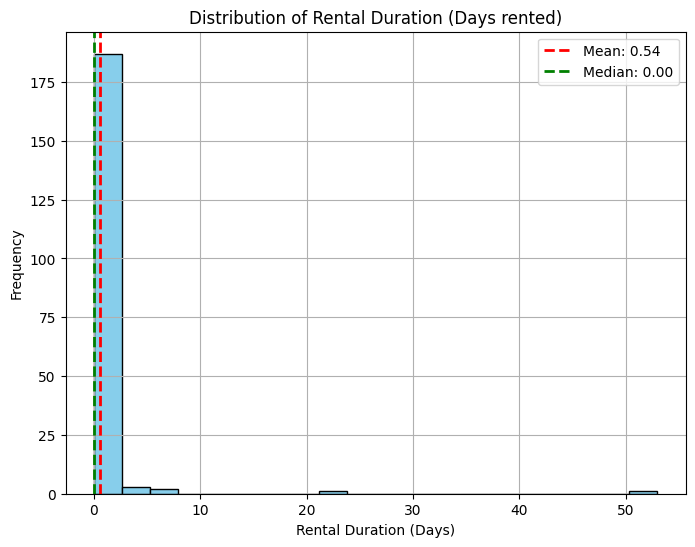

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert 'Days rented' to numeric, coercing errors to NaN
df['Days rented'] = pd.to_numeric(df['Days rented'], errors='coerce')

# Calculate descriptive statistics for 'Rental Duration' (Days rented)
rental_duration_stats = df['Days rented'].describe()
print("\nRental Duration Statistics:\n", rental_duration_stats)

# Additional Statistical Analysis
# 1. Median
median_rental_duration = df['Days rented'].median()
print(f"Median Rental Duration: {median_rental_duration:.2f} days")

# 2. Standard Deviation
std_dev_rental_duration = df['Days rented'].std()
print(f"Standard Deviation of Rental Duration: {std_dev_rental_duration:.2f} days")

# 3. Skewness
skewness_rental_duration = df['Days rented'].skew()
print(f"Skewness of Rental Duration: {skewness_rental_duration:.2f}")

# 4. Kurtosis
kurtosis_rental_duration = df['Days rented'].kurt()
print(f"Kurtosis of Rental Duration: {kurtosis_rental_duration:.2f}")

# 5. Outlier Detection using IQR (Interquartile Range)
Q1 = df['Days rented'].quantile(0.25)
Q3 = df['Days rented'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Days rented'] < lower_bound) | (df['Days rented'] > upper_bound)]
print(f"\nPotential Outliers (Rental Duration):\n{outliers}")

# Visualizing the Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Days rented'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(df['Days rented'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Days rented'].mean():.2f}")
plt.axvline(median_rental_duration, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_rental_duration:.2f}")
plt.title("Distribution of Rental Duration (Days rented)")
plt.xlabel('Rental Duration (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


The code processes the "Acres serviced" data, visualizes its distribution with a histogram, and compares the total acres serviced by customers who rented implements versus those who did not. It uses a t-test to determine if there is a significant difference in acres serviced between the two groups. Here's a breakdown:

1. **Data Conversion**: The "Acres serviced" column is converted to numeric, handling errors by coercing them to `NaN`.
2. **Visualization**: A histogram is plotted to show the distribution of acres serviced with rented implements.
3. **Statistical Comparison**: The t-test compares the acres serviced by customers who rented implements versus those who didn't, outputting a t-statistic and p-value.
4. **Interpretation**: If the p-value is less than 0.05, it indicates a significant difference in acres serviced between the two groups.

This analysis helps understand the impact of renting implements on the total acres serviced by customers.

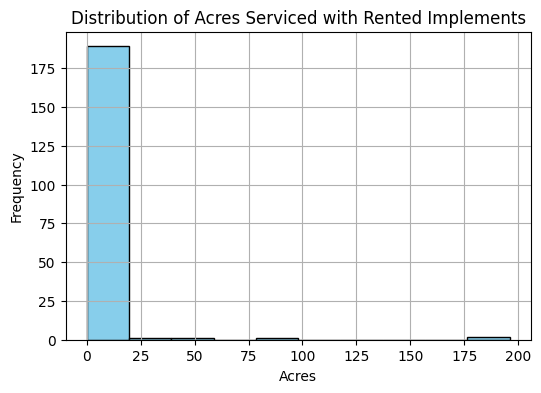

Total Acres Serviced with Rented Implements: 595
Descriptive Statistics for Rented Implements Customers:
count      9.000000
mean      66.111111
std       76.764973
min        2.000000
25%       14.000000
50%       31.000000
75%       80.000000
max      196.000000
Name: Acres  serviced, dtype: float64

Descriptive Statistics for Non-Rented Implements Customers:
count    185.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Acres  serviced, dtype: float64


<Figure size 800x600 with 0 Axes>

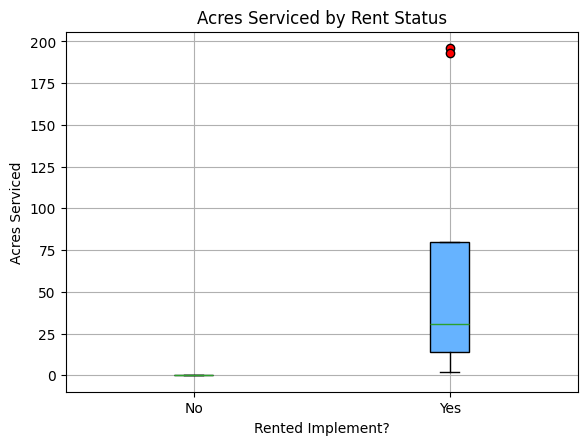


Shapiro-Wilk Test for Normality (Rented Implements): Statistic=0.770, p-value=0.0093
Shapiro-Wilk Test for Normality (Non-Rented Implements): Statistic=1.000, p-value=1.0000

T-statistic: 12.36
P-value: 0.0000
There is a significant difference in acres serviced between customers who rented and did not rent an implement.

Cohen's d (Effect Size): 1.22
The effect size is large.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert 'Acres serviced' to numeric, coercing errors to NaN
df['Acres  serviced'] = pd.to_numeric(df['Acres  serviced'], errors='coerce')

# Total acres serviced with rented implements
total_rented_acres = df['Acres  serviced'].sum()

# Plot the distribution of acres serviced with rented implements
plt.figure(figsize=(6, 4))
df['Acres  serviced'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Acres Serviced with Rented Implements')
plt.xlabel('Acres')
plt.ylabel('Frequency')
plt.show()

# Print the total acres serviced with rented implements
print(f"Total Acres Serviced with Rented Implements: {total_rented_acres}")

# Filter customers who rented implements (assuming 'Rented Implement?' column holds 'Yes' or 'No')
rented_customers = df[df['Rented Implement?'] == 'Yes']
non_rented_customers = df[df['Rented Implement?'] == 'No']

# Calculate acres serviced for each group
acres_serviced_rented = rented_customers['Acres  serviced'].dropna()
acres_serviced_non_rented = non_rented_customers['Acres  serviced'].dropna()

# Descriptive statistics for both groups
print("Descriptive Statistics for Rented Implements Customers:")
print(acres_serviced_rented.describe())

print("\nDescriptive Statistics for Non-Rented Implements Customers:")
print(acres_serviced_non_rented.describe())

# Plot boxplots to visualize the spread of data
plt.figure(figsize=(8, 6))
df.boxplot(column='Acres  serviced', by='Rented Implement?', patch_artist=True,
           boxprops=dict(facecolor='#66b3ff', color='black'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=6),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'))
plt.title('Acres Serviced by Rent Status')
plt.suptitle('')  # Remove default title
plt.xlabel('Rented Implement?')
plt.ylabel('Acres Serviced')
plt.show()

# Shapiro-Wilk test for normality
shapiro_rented = stats.shapiro(acres_serviced_rented)
shapiro_non_rented = stats.shapiro(acres_serviced_non_rented)

print(f"\nShapiro-Wilk Test for Normality (Rented Implements): Statistic={shapiro_rented[0]:.3f}, p-value={shapiro_rented[1]:.4f}")
print(f"Shapiro-Wilk Test for Normality (Non-Rented Implements): Statistic={shapiro_non_rented[0]:.3f}, p-value={shapiro_non_rented[1]:.4f}")

# If p-value < 0.05, data is not normally distributed, so you may consider a non-parametric test (Mann-Whitney U test)

# Calculate t-test between the two groups (rented vs non-rented)
t_stat, p_value = stats.ttest_ind(acres_serviced_rented, acres_serviced_non_rented, nan_policy='omit')

# Print the t-test results
print(f"\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the t-test result
if p_value < 0.05:
    print("There is a significant difference in acres serviced between customers who rented and did not rent an implement.")
else:
    print("There is no significant difference in acres serviced between the two groups.")

# Effect Size (Cohen's d)
pooled_std = ((acres_serviced_rented.std() ** 2 + acres_serviced_non_rented.std() ** 2) / 2) ** 0.5
cohens_d = (acres_serviced_rented.mean() - acres_serviced_non_rented.mean()) / pooled_std
print(f"\nCohen's d (Effect Size): {cohens_d:.2f}")

# Interpretation of Cohen's d:
if cohens_d < 0.2:
    print("The effect size is small.")
elif cohens_d < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")


The code calculates the correlation between the number of implements owned and the total acres serviced, then visualizes the relationship through a scatter plot. Here's a step-by-step breakdown of the code:

1. **Correlation Calculation**: The correlation coefficient between the columns 'Total Acres Serviced' and 'No. of implements owned' is computed using the `.corr()` method. This will indicate the strength and direction of the linear relationship between the two variables.
   
2. **Scatter Plot**: A scatter plot is created to visually represent the relationship between the number of implements owned and the total acres serviced. The x-axis represents the number of implements owned, and the y-axis shows the total acres serviced. This helps to visually examine whether a pattern exists between the two variables.

The printed correlation value will tell you whether the number of implements owned has a positive or negative linear relationship with the total acres serviced.



Pearson Correlation between Total Acres Serviced and Number of Implements Owned: 0.4212
Spearman Rank Correlation between Total Acres Serviced and Number of Implements Owned: 0.4578


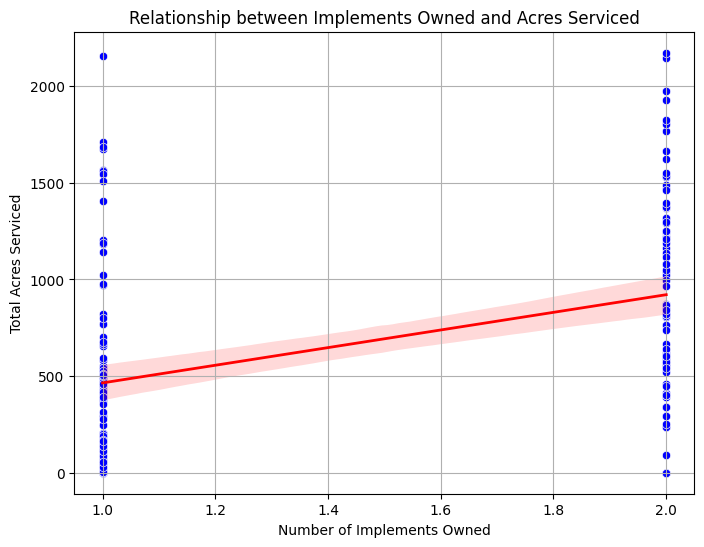


Linear Regression Results:
Slope: 456.3552
Intercept: 8.4786
R-squared value: 0.1774
The relationship between the variables is weak.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Calculate Pearson correlation coefficient
correlation_pearson = df['Total Acres Serviced'].corr(df['No. of implements owned'])
print(f"Pearson Correlation between Total Acres Serviced and Number of Implements Owned: {correlation_pearson:.4f}")

# Calculate Spearman rank correlation
correlation_spearman = df['Total Acres Serviced'].corr(df['No. of implements owned'], method='spearman')
print(f"Spearman Rank Correlation between Total Acres Serviced and Number of Implements Owned: {correlation_spearman:.4f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='No. of implements owned', y='Total Acres Serviced', data=df, color='blue')

# Add a linear regression line for better understanding of the relationship
sns.regplot(x='No. of implements owned', y='Total Acres Serviced', data=df, scatter=False, color='red', line_kws={"color": "red", "lw": 2})

plt.xlabel('Number of Implements Owned')
plt.ylabel('Total Acres Serviced')
plt.title('Relationship between Implements Owned and Acres Serviced')
plt.grid(True)
plt.show()

# Linear Regression Model
X = df[['No. of implements owned']].dropna()  # Independent variable
y = df['Total Acres Serviced'].dropna()  # Dependent variable

# Drop rows where either X or y has NaN values
df_cleaned = pd.concat([X, y], axis=1).dropna()

# Get the cleaned X and y
X_cleaned = df_cleaned[['No. of implements owned']]
y_cleaned = df_cleaned['Total Acres Serviced']

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_cleaned, y_cleaned)

# Get the regression coefficients
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Print the regression results
print(f"\nLinear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# Predict the values using the linear regression model
y_pred = regressor.predict(X_cleaned)

# Calculate R-squared value (coefficient of determination)
r_squared = regressor.score(X_cleaned, y_cleaned)
print(f"R-squared value: {r_squared:.4f}")

# Interpretation of R-squared
if r_squared < 0.2:
    print("The relationship between the variables is weak.")
elif r_squared < 0.5:
    print("The relationship between the variables is moderate.")
else:
    print("The relationship between the variables is strong.")
